In [156]:
# manage data and fit
import pandas as pd
import numpy as np

# first part with least squares
from scipy.optimize import curve_fit

# second part about ODR
from scipy.odr import ODR, Model, Data, RealData

# style and notebook integration of the plots
import seaborn as sns
%matplotlib inline 
sns.set(style="whitegrid", font_scale=2)

from math import sqrt,pi,exp

In [157]:
df = pd.read_csv(
    "2018-11 JMT Li-rich NMC Pristine-csp-22112018 (1).TXT", 
    sep="\t",
    skiprows=3,
)

In [158]:
df

,KE_LiM3p_s MRSof/23,BE_LiM3p_s MRSof/23,CPS_LiM3p_s MRSof/23,Mn 3p_1_LiM3p_s MRSof/23,Mn 3p_2_LiM3p_s MRSof/23,Li 1s_3_LiM3p_s MRSof/23,Co 3p_4_LiM3p_s MRSof/23,Co 3p + Na2s_5_LiM3p_s MRSof/23,Ni 3p_6_LiM3p_s MRSof/23,Ni 3p_7_LiM3p_s MRSof/23,Ni 3p_8_LiM3p_s MRSof/23,Mn 3s_9_LiM3p_s MRSof/23,Mn 3s_10_LiM3p_s MRSof/23,Li 1s7_11_LiM3p_s MRSof/23,Ni 3p_12_LiM3p_s MRSof/23,Background_LiM3p_s MRSof/23,Envelope_LiM3p_s MRSof/23
0,1390.79,95.9,175.30,175.30,175.3000,175.30,175.30,175.30,175.30,175.30,175.30,175.30,175.318,175.30,175.30,175.30,175.3180
1,1390.89,95.8,175.90,175.90,175.9000,175.90,175.90,175.90,175.90,175.90,175.90,175.90,175.922,175.90,175.90,175.90,175.9220
2,1390.99,95.7,180.85,180.85,180.8500,180.85,180.85,180.85,180.85,180.85,180.85,180.85,180.876,180.85,180.85,180.85,180.8760
3,1391.09,95.6,180.75,180.75,180.7500,180.75,180.75,180.75,180.75,180.75,180.75,180.75,180.781,180.75,180.75,180.75,180.7810
4,1391.19,95.5,178.35,178.35,178.3500,178.35,178.35,178.35,178.35,178.35,178.35,178.35,178.388,178.35,178.35,178.35,178.3880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1443.39,43.3,60.40,60.40,60.4040,60.40,60.40,60.40,60.40,60.40,60.40,60.40,60.400,60.40,60.40,60.40,60.4040
527,1443.49,43.2,61.20,61.20,61.2032,61.20,61.20,61.20,61.20,61.20,61.20,61.20,61.200,61.20,61.20,61.20,61.2032
528,1443.59,43.1,62.65,62.65,62.6525,62.65,62.65,62.65,62.65,62.65,62.65,62.65,62.650,62.65,62.65,62.65,62.6525
529,1443.69,43.0,63.25,63.25,63.2520,63.25,63.25,63.25,63.25,63.25,63.25,63.25,63.250,63.25,63.25,63.25,63.2520


In [159]:
ddf = df.set_index("BE_LiM3p_s MRSof/23")
ddf

,KE_LiM3p_s MRSof/23,CPS_LiM3p_s MRSof/23,Mn 3p_1_LiM3p_s MRSof/23,Mn 3p_2_LiM3p_s MRSof/23,Li 1s_3_LiM3p_s MRSof/23,Co 3p_4_LiM3p_s MRSof/23,Co 3p + Na2s_5_LiM3p_s MRSof/23,Ni 3p_6_LiM3p_s MRSof/23,Ni 3p_7_LiM3p_s MRSof/23,Ni 3p_8_LiM3p_s MRSof/23,Mn 3s_9_LiM3p_s MRSof/23,Mn 3s_10_LiM3p_s MRSof/23,Li 1s7_11_LiM3p_s MRSof/23,Ni 3p_12_LiM3p_s MRSof/23,Background_LiM3p_s MRSof/23,Envelope_LiM3p_s MRSof/23
BE_LiM3p_s MRSof/23,,,,,,,,,,,,,,,,
95.9,1390.79,175.30,175.30,175.3000,175.30,175.30,175.30,175.30,175.30,175.30,175.30,175.318,175.30,175.30,175.30,175.3180
95.8,1390.89,175.90,175.90,175.9000,175.90,175.90,175.90,175.90,175.90,175.90,175.90,175.922,175.90,175.90,175.90,175.9220
95.7,1390.99,180.85,180.85,180.8500,180.85,180.85,180.85,180.85,180.85,180.85,180.85,180.876,180.85,180.85,180.85,180.8760
95.6,1391.09,180.75,180.75,180.7500,180.75,180.75,180.75,180.75,180.75,180.75,180.75,180.781,180.75,180.75,180.75,180.7810
95.5,1391.19,178.35,178.35,178.3500,178.35,178.35,178.35,178.35,178.35,178.35,178.35,178.388,178.35,178.35,178.35,178.3880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43.3,1443.39,60.40,60.40,60.4040,60.40,60.40,60.40,60.40,60.40,60.40,60.40,60.400,60.40,60.40,60.40,60.4040
43.2,1443.49,61.20,61.20,61.2032,61.20,61.20,61.20,61.20,61.20,61.20,61.20,61.200,61.20,61.20,61.20,61.2032
43.1,1443.59,62.65,62.65,62.6525,62.65,62.65,62.65,62.65,62.65,62.65,62.65,62.650,62.65,62.65,62.65,62.6525


In [160]:
import matplotlib.pyplot as plt
plt.rcParams["font.size"] = 10

<AxesSubplot:xlabel='BE_LiM3p_s MRSof/23'>

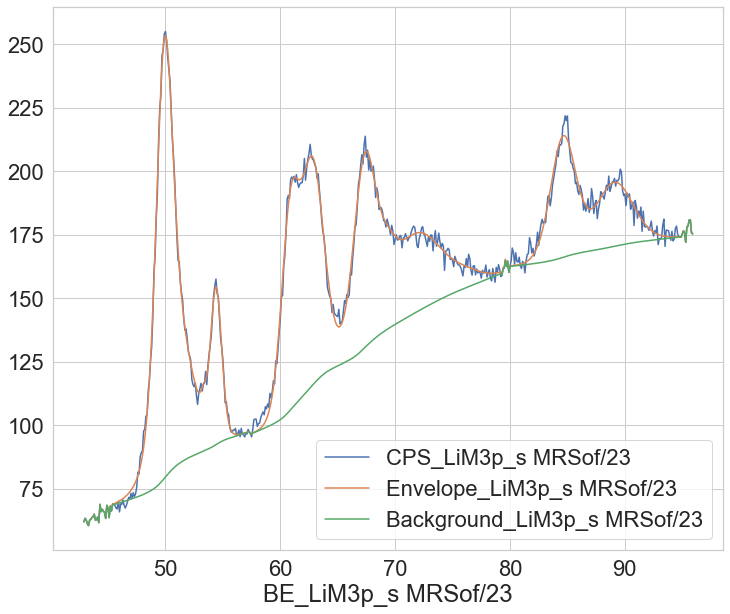

In [161]:
(ddf.iloc[:,[1,-1,-2]]).plot(figsize=(12, 10), legend=True
        )

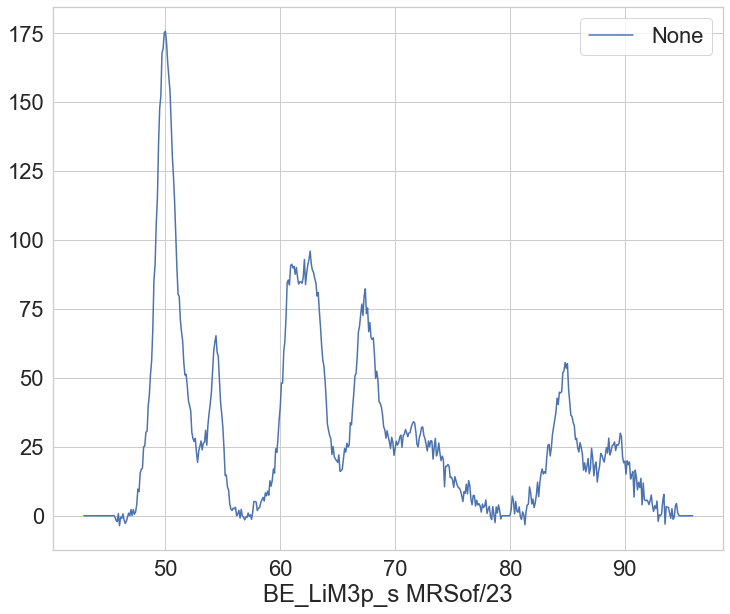

In [162]:
fig = (ddf.iloc[:,1]- ddf.iloc[:,-3]).plot(figsize=(12, 10), legend=True
        )

<AxesSubplot:xlabel='BE_LiM3p_s MRSof/23'>

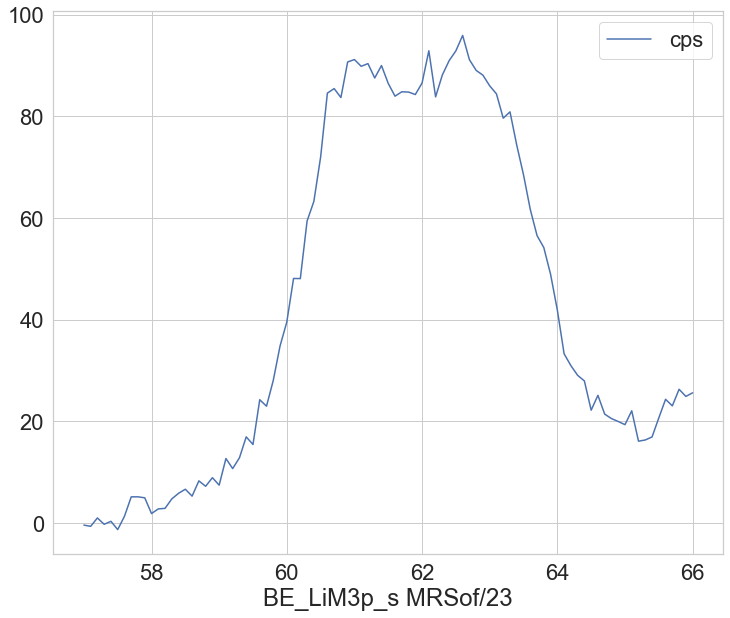

In [163]:
data= pd.DataFrame()
CPS=(ddf["CPS_LiM3p_s MRSof/23"]- ddf["Background_LiM3p_s MRSof/23"])
data["cps"]=CPS
data["be"]=data.index
data2=data.loc[(data.index<=66) & (data.index>=57)]
(data2.iloc[:,0]).plot(figsize=(12, 10), legend=True)

In [164]:
def gaussienne(x,a,mu,sigma):
    return a*((1/(sqrt(2*pi)*sigma))*np.exp(-1/2*((x-mu)/sigma)**2))

In [165]:
popt, pcov = curve_fit(
    f=gaussienne,       # model function
    xdata=data2["be"],   # x data
    ydata=data2["cps"],   # y data
    p0=[400,61, 1],      # initial value of the parameters
)

[391.57507533  62.05400022   1.61489777]


<ipython-input-166-ae6f9232c08d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2["gauss3"]=a


<AxesSubplot:xlabel='BE_LiM3p_s MRSof/23'>

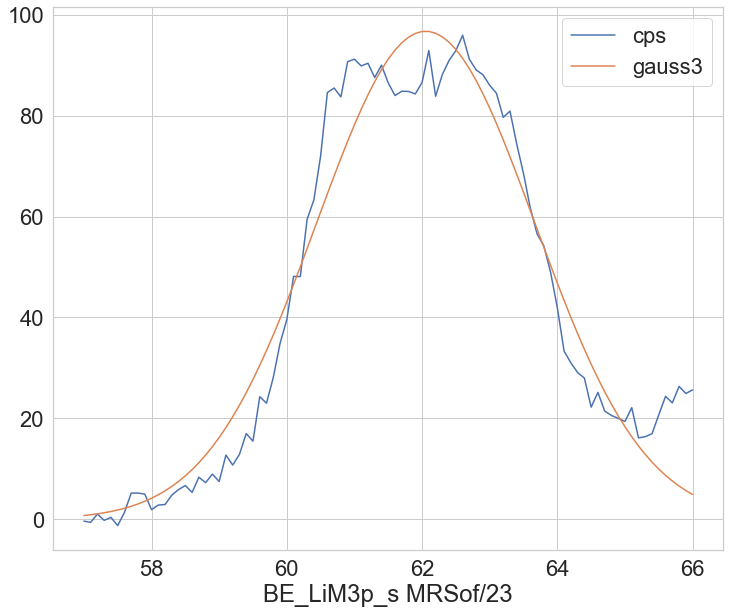

In [166]:
print(popt)
a=gaussienne(data2["be"],popt[0],popt[1],popt[2])
data2["gauss3"]=a
(data2.iloc[:,[0,-1]]).plot(figsize=(12, 10), legend=True
        )

In [167]:
data2=data.loc[(data.index<=70) & (data.index>=65)]

In [168]:
popt, pcov = curve_fit(
    f=gaussienne,       # model function
    xdata=data2["be"],   # x data
    ydata=data2["cps"],   # y data
    p0=[400,67, 1],      # initial value of the parameters
)

[264.13357111  67.72444408   1.46865512]


<ipython-input-169-e567d7087d98>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2["gauss4"]=a


<AxesSubplot:xlabel='BE_LiM3p_s MRSof/23'>

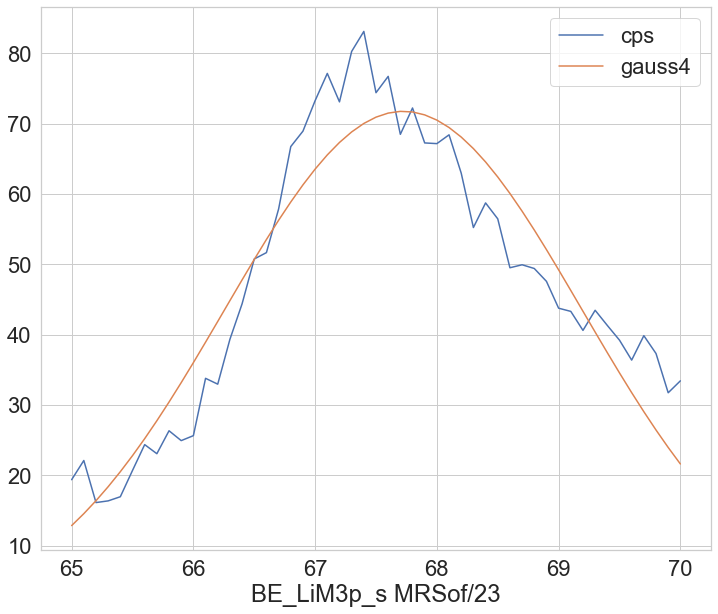

In [169]:
print(popt)
a=gaussienne(data2["be"],popt[0],popt[1],popt[2])
data2["gauss4"]=a
(data2.iloc[:,[0,-1]]).plot(figsize=(12, 10), legend=True
        )

[406.93561838  50.09206629   0.99923838]


<ipython-input-170-3e823f637f22>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2["gauss1"]=a


<AxesSubplot:xlabel='BE_LiM3p_s MRSof/23'>

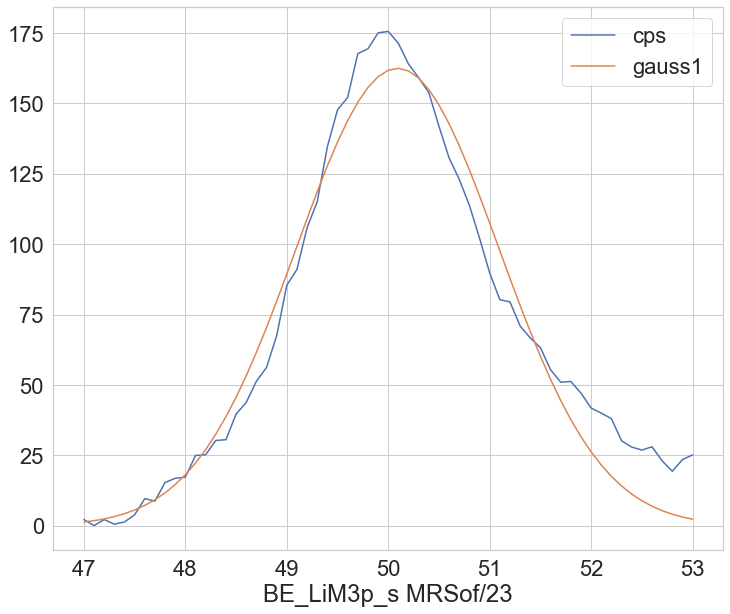

In [170]:
data2=data.loc[(data.index<=53) & (data.index>=47)]

popt, pcov = curve_fit(
    f=gaussienne,       # model function
    xdata=data2["be"],   # x data
    ydata=data2["cps"],   # y data
    p0=[800,50, 1],      # initial value of the parameters
)

print(popt)
a=gaussienne(data2["be"],popt[0],popt[1],popt[2])
data2["gauss1"]=a
(data2.iloc[:,[0,-1]]).plot(figsize=(12, 10), legend=True
        )

[86.22668199 54.34182088  0.5671741 ]


<ipython-input-171-18d461ff92f5>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2["gauss2"]=a


<AxesSubplot:xlabel='BE_LiM3p_s MRSof/23'>

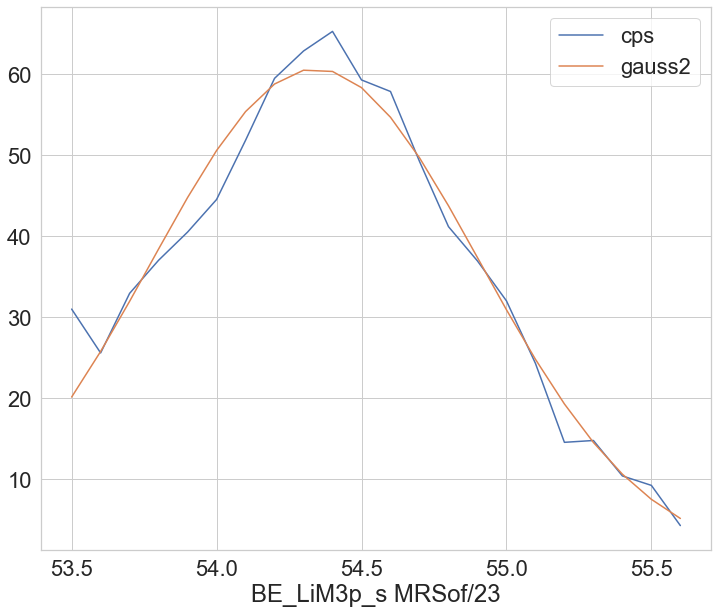

In [171]:
data2=data.loc[(data.index<=55.6) & (data.index>=53.5)]

popt, pcov = curve_fit(
    f=gaussienne,       # model function
    xdata=data2["be"],   # x data
    ydata=data2["cps"],   # y data
    p0=[300,54, 1],      # initial value of the parameters
)

print(popt)
a=gaussienne(data2["be"],popt[0],popt[1],popt[2])
data2["gauss2"]=a
(data2.iloc[:,[0,-1]]).plot(figsize=(12, 10), legend=True
        )

[269.89099878  70.74386173   3.28513548]


<ipython-input-176-33b5ba2917bb>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2["gauss5"]=a


<AxesSubplot:xlabel='BE_LiM3p_s MRSof/23'>

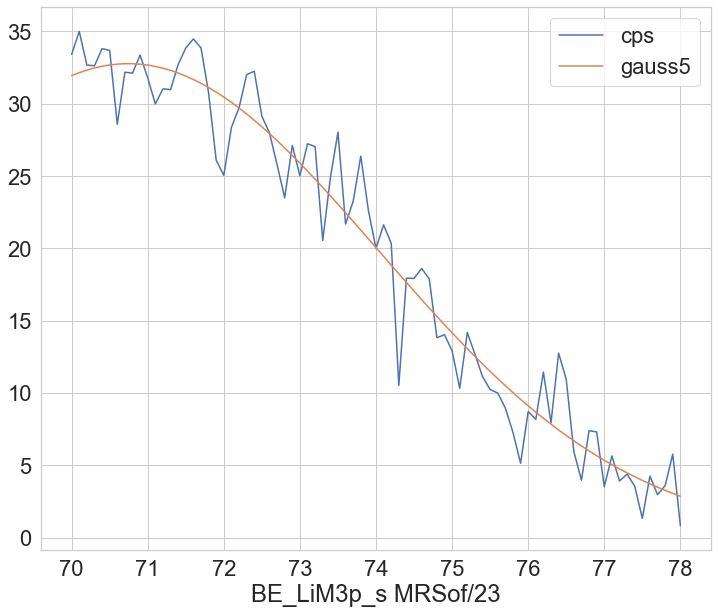

In [176]:
data2=data.loc[(data.index<=78) & (data.index>=70)]

popt, pcov = curve_fit(
    f=gaussienne,       # model function
    xdata=data2["be"],   # x data
    ydata=data2["cps"],   # y data
    p0=[100, 71, 3],      # initial value of the parameters
)

print(popt)
a=gaussienne(data2["be"],popt[0],popt[1],popt[2])
data2["gauss5"]=a
(data2.iloc[:,[0,-1]]).plot(figsize=(12, 10), legend=True
        )

[161.29296255  84.87186863   1.48236971]


<ipython-input-174-2b1c4d78c468>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2["gauss6"]=a


<AxesSubplot:xlabel='BE_LiM3p_s MRSof/23'>

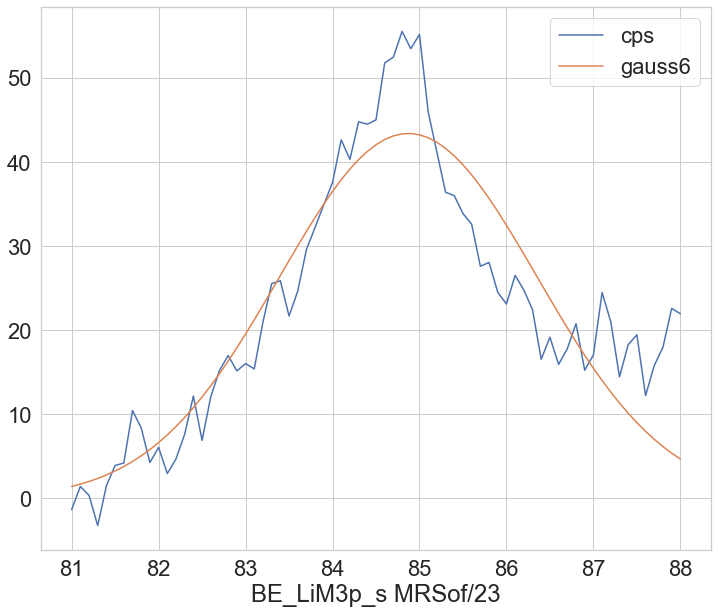

In [174]:
data2=data.loc[(data.index<=88) & (data.index>=81)]

popt, pcov = curve_fit(
    f=gaussienne,       # model function
    xdata=data2["be"],   # x data
    ydata=data2["cps"],   # y data
    p0=[300, 85, 1],      # initial value of the parameters
)

print(popt)
a=gaussienne(data2["be"],popt[0],popt[1],popt[2])
data2["gauss6"]=a
(data2.iloc[:,[0,-1]]).plot(figsize=(12, 10), legend=True
        )

[95.75080968 89.07768254  1.47707864]


<ipython-input-177-216be52412d6>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2["gauss7"]=a


<AxesSubplot:xlabel='BE_LiM3p_s MRSof/23'>

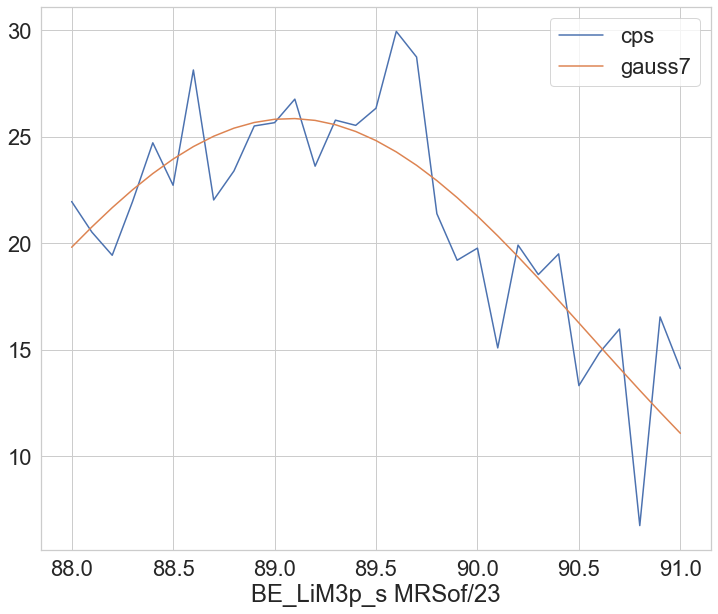

In [177]:
data2=data.loc[(data.index<=91) & (data.index>=88)]

popt, pcov = curve_fit(
    f=gaussienne,       # model function
    xdata=data2["be"],   # x data
    ydata=data2["cps"],   # y data
    p0=[100, 89, 3],      # initial value of the parameters
)

print(popt)
a=gaussienne(data2["be"],popt[0],popt[1],popt[2])
data2["gauss7"]=a
(data2.iloc[:,[0,-1]]).plot(figsize=(12, 10), legend=True
        )

<AxesSubplot:xlabel='BE_LiM3p_s MRSof/23'>

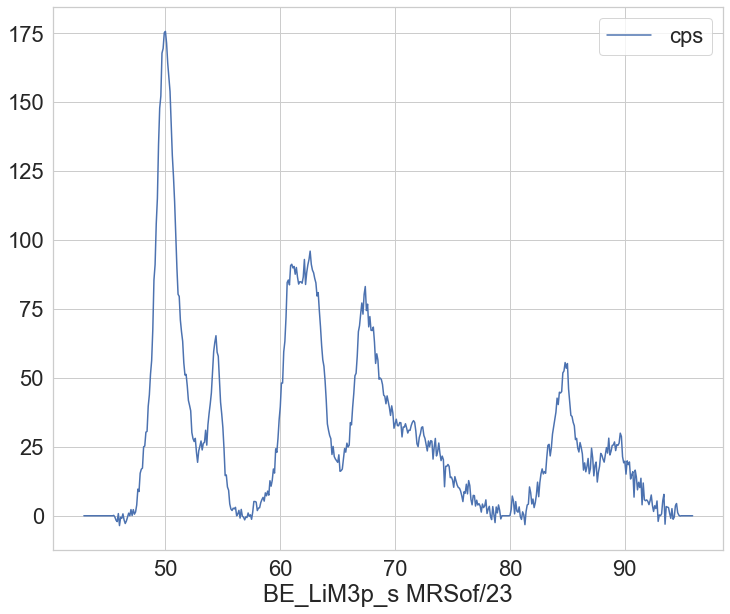

In [178]:
data2=data
(data2.iloc[:,0]).plot(figsize=(12, 10), legend=True)

In [179]:
data2

,cps,be
BE_LiM3p_s MRSof/23,,
95.9,0.0,95.9
95.8,0.0,95.8
95.7,0.0,95.7
95.6,0.0,95.6
95.5,0.0,95.5
...,...,...
43.3,0.0,43.3
43.2,0.0,43.2
43.1,0.0,43.1


<AxesSubplot:xlabel='BE_LiM3p_s MRSof/23'>

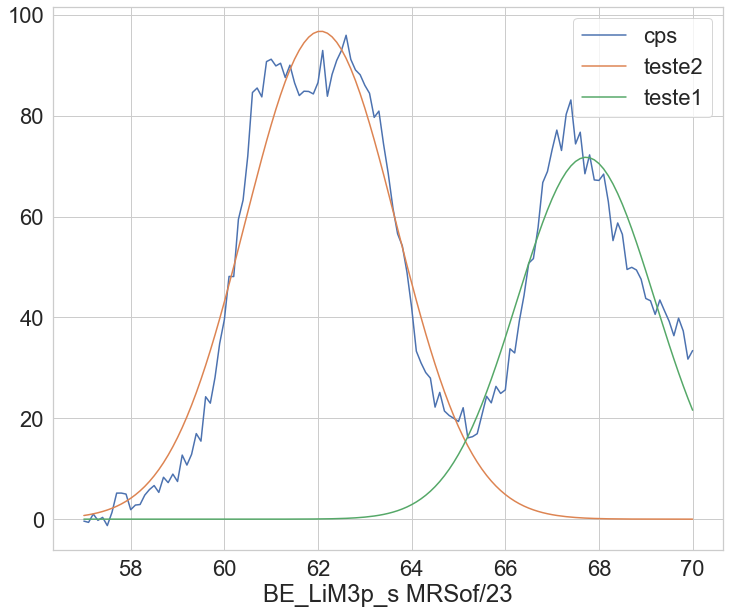

In [103]:
(data2.iloc[:,[0,-1,-2]]).plot(figsize=(12, 10), legend=True
        )

In [104]:
data2["somme"]=data2["teste1"]+data2["teste2"]

<ipython-input-104-76497b86cdaa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2["somme"]=data2["teste1"]+data2["teste2"]


In [105]:
data2

,cps,be,teste,teste1,teste2,somme
BE_LiM3p_s MRSof/23,,,,,,
70.0,33.4200,70.0,0.000535,2.160287e+01,0.000535,21.603407
69.9,31.7270,69.9,0.000724,2.395093e+01,0.000724,23.951651
69.8,37.3060,69.8,0.000976,2.643137e+01,0.000976,26.432349
69.7,39.8450,69.7,0.001312,2.903378e+01,0.001312,29.035095
69.6,36.3700,69.6,0.001755,3.174491e+01,0.001755,31.746663
...,...,...,...,...,...,...
57.4,0.3500,57.4,1.520815,1.332357e-09,1.520815,1.520815
57.3,-0.2328,57.3,1.269815,8.236343e-10,1.269815,1.269815
57.2,1.0157,57.2,1.056183,5.067980e-10,1.056183,1.056183


<AxesSubplot:xlabel='BE_LiM3p_s MRSof/23'>

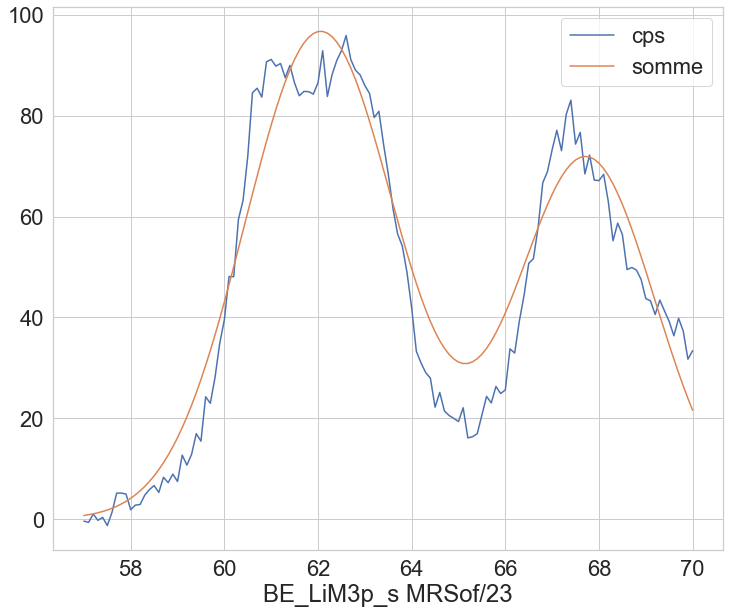

In [106]:
(data2.iloc[:,[0,-1]]).plot(figsize=(12, 10), legend=True
        )